## Imports:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
dataframe = pd.read_csv("amazon_reviews_labelled1.csv")
dataframe.head(5)

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,RATING,VERIFIED_PURCHASE,REVIEW_TITLE,REVIEW_TEXT,NUM_NOUNS,...,WORD_COUNT,SENTIMENT_SCORE_TITLE,SENTIMENT_LABEL_TITLE,AVG_RATING_VERIFIED,AVG_RATING_NON_VERIFIED,DEVIATION_VERIFIED,DEVIATION_NON_VERIFIED,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,0,0,0,0,0,4,0,useful,think so product save day case need someth,4,...,8,0.4404,1,4.243802,3.982262,0.243802,0.017738,NaN,NaN,NaN
1,1,1,1,1,1,4,1,New era for batteries,lithium batteri new introduc market averag dev...,15,...,37,0.0000,0,4.243802,3.982262,0.243802,0.017738,NaN,NaN,NaN
2,2,2,2,2,2,3,0,doesn't swing very well.,purchas swing babi 6 month pretti grow -pron- ...,7,...,24,-0.2572,0,4.243802,3.982262,1.243802,0.982262,NaN,NaN,NaN
3,3,3,3,3,3,4,0,Great computing!,look inexpen desk calcolatur be work ne issu t...,8,...,17,0.6588,1,4.243802,3.982262,0.243802,0.017738,NaN,NaN,NaN
4,4,4,4,4,4,4,0,Only use twice a week,use twice week result great tooth whiten solut...,14,...,20,0.0000,0,4.243802,3.982262,0.243802,0.017738,NaN,NaN,NaN


## Data Cleaning:

In [9]:
dataframe.isnull().sum()

Unnamed: 0.4                      0
Unnamed: 0.3                      0
Unnamed: 0.2                      0
Unnamed: 0.1                      0
Unnamed: 0                        0
RATING                            0
VERIFIED_PURCHASE                 0
REVIEW_TITLE                      0
REVIEW_TEXT                       0
NUM_NOUNS                         0
NUM_VERBS                         0
NUM_ADJECTIVES                    0
NUM_ADVERBS                       0
REVIEW_LENGTH                     0
SENTIMENT_SCORE                   0
TITLE_LENGTH                      0
AVERAGE_RATING                    0
RATING_DEVIATION                  0
NUM_REVIEWS                       0
READABILITY_FRE                   0
SENTIMENT_CATEGORY_ENCODED        0
RATING_CATEGORY_ENCODED           0
COHERENT_ENCODED                  0
AVG_WORD_LENGTH                   0
LABEL_ENCODED                     0
NUM_NAMED_ENTITIES                0
CAPITAL_CHAR_COUNT                0
PUNCTUATION_COUNT           

In [10]:
columns_to_drop = [
    'Unnamed: 0.4',
    'Unnamed: 0.3',
    'Unnamed: 0.2',
    'Unnamed: 0.1',
    'Unnamed: 0',
    'AVERAGE_RATING',
    'RATING_DEVIATION',
    'READABILITY_FRE',
    'COHERENT_ENCODED',
    'AVG_WORD_LENGTH',
    'NUM_NAMED_ENTITIES',
    'AVG_RATING_VERIFIED',
    'AVG_RATING_NON_VERIFIED',
    'DEVIATION_VERIFIED',
    'DEVIATION_NON_VERIFIED',
    'CAPITAL_CHAR_COUNT',
    'PUNCTUATION_COUNT',
    'Unnamed: 36',
    'Unnamed: 37',
    'Unnamed: 38',
    'SENTIMENT_SCORE_TITLE',
    'SENTIMENT_LABEL_TITLE'
]

dataframe = dataframe.drop(columns = columns_to_drop)


##Data Processing:

In [4]:
dataframe['PROP_NOUNS'] = dataframe['NUM_NOUNS'] / dataframe['WORD_COUNT']
dataframe['PROP_VERBS'] = dataframe['NUM_VERBS'] / dataframe['WORD_COUNT']
dataframe['PROP_ADJECTIVES'] = dataframe['NUM_ADJECTIVES'] / dataframe['WORD_COUNT']
dataframe['PROP_ADVERBS'] = dataframe['NUM_ADVERBS'] / dataframe['WORD_COUNT']

dataframe = dataframe.drop(['NUM_NOUNS'], axis=1)
dataframe = dataframe.drop(['NUM_VERBS'], axis=1)
dataframe = dataframe.drop(['NUM_ADJECTIVES'], axis=1)
dataframe = dataframe.drop(['NUM_ADVERBS'], axis=1)

In [5]:
dataframe

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,RATING,VERIFIED_PURCHASE,REVIEW_TITLE,REVIEW_TEXT,REVIEW_LENGTH,...,AVG_RATING_NON_VERIFIED,DEVIATION_VERIFIED,DEVIATION_NON_VERIFIED,Unnamed: 36,Unnamed: 37,Unnamed: 38,PROP_NOUNS,PROP_VERBS,PROP_ADJECTIVES,PROP_ADVERBS
0,0,0,0,0,0,4,0,useful,think so product save day case need someth,116,...,3.982262,0.243802,0.017738,NaN,NaN,NaN,0.500000,0.625000,0.125000,0.625000
1,1,1,1,1,1,4,1,New era for batteries,lithium batteri new introduc market averag dev...,404,...,3.982262,0.243802,0.017738,NaN,NaN,NaN,0.405405,0.405405,0.324324,0.135135
2,2,2,2,2,2,3,0,doesn't swing very well.,purchas swing babi 6 month pretti grow -pron- ...,248,...,3.982262,1.243802,0.982262,NaN,NaN,NaN,0.291667,0.541667,0.166667,0.416667
3,3,3,3,3,3,4,0,Great computing!,look inexpen desk calcolatur be work ne issu t...,212,...,3.982262,0.243802,0.017738,NaN,NaN,NaN,0.470588,0.588235,0.235294,0.294118
4,4,4,4,4,4,4,0,Only use twice a week,use twice week result great tooth whiten solut...,331,...,3.982262,0.243802,0.017738,NaN,NaN,NaN,0.700000,0.600000,0.350000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,20995,20995,20995,20995,20995,4,1,wide width is great!,buy work high arch use arch support heel high,100,...,3.982262,0.243802,0.017738,NaN,NaN,NaN,0.444444,0.444444,0.333333,0.222222
20996,20996,20996,20996,20996,20996,4,1,Love crocs!,croc brand shoe foot day work love cross unise...,115,...,3.982262,0.243802,0.017738,NaN,NaN,NaN,0.636364,0.363636,0.363636,0.090909
20997,20997,20997,20997,20997,20997,5,1,I love moccasins This fit like it was custom m...,love moccasin fit like custom mebr veri soft c...,297,...,3.982262,0.756198,1.017738,NaN,NaN,NaN,0.320000,0.560000,0.240000,0.240000
20998,20998,20998,20998,20998,20998,5,1,"This fit well, comfortable, best investment",wish littl durabl get catch bolt cross bunk fe...,287,...,3.982262,0.756198,1.017738,NaN,NaN,NaN,0.428571,0.464286,0.142857,0.035714


## Data Analysis (Dont Run):

<ipython-input-9-7cd1dfdef314>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), annot = False)


<Axes: >

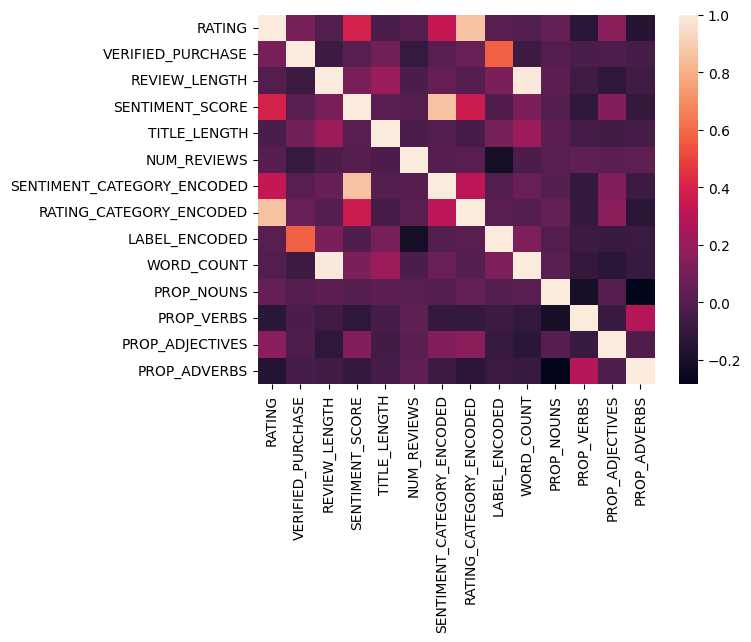

In [9]:
sns.heatmap(dataframe.corr(), annot = False)

In [ ]:
subset_dataframe = dataframe.sample(n=200, random_state=42)

# Use sns.pairplot with the subset DataFrame
sns.pairplot(subset_dataframe, hue = 'LABEL_ENCODED')

# Display the plot
plt.show()

sentiment score title might be an important feature?

## Sentiment Score:

In [6]:
from textblob import TextBlob

def calculate_sentiment_score(text):

    # Create a TextBlob object
    blob = TextBlob(text)

    # Calculate the sentiment polarity (-1.0 to 1.0, where negative means negative sentiment and positive means positive sentiment)
    sentiment_score = blob.sentiment.polarity

    return sentiment_score

if __name__ == "__main__":
    input_text = "This is a bad product. I did not enjoy using it that much"
    score = calculate_sentiment_score(input_text)
    print("Sentiment Score:", score)

Sentiment Score: -0.2333333333333333


(TextBlob calculates its sentiment scores using unigram tokenization)

# **Bigram Tokenisation**:

In [7]:
#Label_Encoded 0 = Fake Product Review
#Label_Encoded 1 = Real Product Review


split_row_number = 10500

df_fake = dataframe.iloc[:split_row_number]
df_real = dataframe.iloc[split_row_number:]



# Make a list of bigrams in fake reviews and real reviews
def get_bigrams(sentence):
    words = sentence.split()
    bigrams = [(words[i], words[i + 1]) for i in range(len(words) - 1)]
    return bigrams

all_bigrams_fake = []
all_bigrams_real = []

for sentence in df_fake['REVIEW_TEXT']:
    bigrams = get_bigrams(sentence)
    all_bigrams_fake.extend(bigrams)

for sentence in df_real['REVIEW_TEXT']:
    bigrams = get_bigrams(sentence)
    all_bigrams_real.extend(bigrams)

print("Number of Fake Review Bigrams: ",len(all_bigrams_fake))
print("Number of Real Review Bigrams: ",len(all_bigrams_real))

# List of all bigrams
all_bigrams = []

for sentence in dataframe['REVIEW_TEXT']:
    bigrams = get_bigrams(sentence)
    all_bigrams.extend(bigrams)


Number of Fake Review Bigrams:  278045
Number of Real Review Bigrams:  387142


In [8]:
def bigram_frequency(bigram, bigram_list):
    return bigram_list.count(bigram)

In [9]:
from collections import Counter

#FAKE

# Calculate frequencies of bigrams in all_bigrams_fake
bigram_freq_fake = Counter(all_bigrams_fake)

frequency_in_fake = {}

# Iterate over all_bigrams and set the frequencies in frequency_in_fake
for bigram in all_bigrams:
    frequency_in_fake[bigram] = bigram_freq_fake.get(bigram, 0)

#REAL

# Calculate frequencies of bigrams in all_bigrams_real
bigram_freq_real = Counter(all_bigrams_real)

frequency_in_real = {}

# Iterate over all_bigrams and set the frequencies in frequency_in_real
for bigram in all_bigrams:
    frequency_in_real[bigram] = bigram_freq_real.get(bigram, 0)




##Bigram Frequency Output Analysis:

In [10]:
from itertools import islice

num_items = 30

first_few_items_in_fake = dict(islice(frequency_in_fake.items(), num_items))

print(first_few_items_in_fake)

{('think', 'so'): 2, ('so', 'product'): 1, ('product', 'save'): 5, ('save', 'day'): 3, ('day', 'case'): 1, ('case', 'need'): 6, ('need', 'someth'): 2, ('lithium', 'batteri'): 3, ('batteri', 'new'): 1, ('new', 'introduc'): 1, ('introduc', 'market'): 1, ('market', 'averag'): 1, ('averag', 'develop'): 1, ('develop', 'cost'): 1, ('cost', 'rel'): 1, ('rel', 'high'): 1, ('high', 'stallion'): 1, ('stallion', 'do'): 1, ('do', 'not'): 2250, ('not', 'compromis'): 1, ('compromis', 'qualiti'): 2, ('qualiti', 'provid'): 1, ('provid', 'good'): 7, ('good', 'low'): 4, ('low', 'costbr'): 1, ('costbr', 'there'): 1, ('there', 'build'): 1, ('build', 'technic'): 1, ('technic', 'assist'): 1, ('assist', 'act'): 1}


In [11]:
count_zero_frequency = 0
for index, (bigram, frequency) in enumerate(frequency_in_fake.items()):
    if frequency == 0:
        print(f"Index: {index}, Bigram: {bigram}")
        count_zero_frequency += 1
        if count_zero_frequency == 20:
            break

Index: 181517, Bigram: ('separ', 'credit')
Index: 181518, Bigram: ('belt', 'upcom')
Index: 181519, Bigram: ('europ', 'fit')
Index: 181520, Bigram: ('fine', 'offer')
Index: 181521, Bigram: ('offer', 'peac')
Index: 181522, Bigram: ('mind', 'electron')
Index: 181523, Bigram: ('electron', 'theft')
Index: 181524, Bigram: ('theft', 'go')
Index: 181525, Bigram: ('probabl', 'excit')
Index: 181526, Bigram: ('excit', 'gift')
Index: 181527, Bigram: ('child', 'kid')
Index: 181528, Bigram: ('kid', 'fascin')
Index: 181529, Bigram: ('fascin', 'concept')
Index: 181530, Bigram: ('concept', 'drive')
Index: 181531, Bigram: ('littl', 'vehicl')
Index: 181532, Bigram: ('vehicl', 'safe')
Index: 181533, Bigram: ('safe', 'maneuv')
Index: 181534, Bigram: ('maneuv', 'awesom')
Index: 181535, Bigram: ('type', 'vehicl')
Index: 181536, Bigram: ('vehicl', '3')


Frequency_in_fake consists of all bigrams and their occurance in fake reviews, almost all the bigrams with a very high index (181000+) have an occurence of 0.
This is because all_bigrams consisted of fake review bigrams then real review bigrams therefore after this index you have those that should have a good occurence in Frequency_in_real.

In [12]:
from itertools import islice

num_items = 30

first_few_items_in_real = dict(islice(frequency_in_real.items(), num_items))

print(first_few_items_in_real)

{('think', 'so'): 2, ('so', 'product'): 1, ('product', 'save'): 2, ('save', 'day'): 1, ('day', 'case'): 1, ('case', 'need'): 10, ('need', 'someth'): 0, ('lithium', 'batteri'): 1, ('batteri', 'new'): 1, ('new', 'introduc'): 0, ('introduc', 'market'): 0, ('market', 'averag'): 0, ('averag', 'develop'): 0, ('develop', 'cost'): 0, ('cost', 'rel'): 0, ('rel', 'high'): 1, ('high', 'stallion'): 0, ('stallion', 'do'): 0, ('do', 'not'): 2884, ('not', 'compromis'): 0, ('compromis', 'qualiti'): 0, ('qualiti', 'provid'): 0, ('provid', 'good'): 8, ('good', 'low'): 3, ('low', 'costbr'): 2, ('costbr', 'there'): 0, ('there', 'build'): 1, ('build', 'technic'): 0, ('technic', 'assist'): 0, ('assist', 'act'): 0}


## Differences:

In [13]:
# Calculate how much more often a bigram appears in fake reviews than in real reviews

bigram_differences = {bigram : frequency_in_fake[bigram] - frequency_in_real.get(bigram, 0) for bigram in frequency_in_fake}

num_items = 30
first_few_items_in_differences = dict(islice(bigram_differences.items(), num_items))

print(first_few_items_in_differences)

{('think', 'so'): 0, ('so', 'product'): 0, ('product', 'save'): 3, ('save', 'day'): 2, ('day', 'case'): 0, ('case', 'need'): -4, ('need', 'someth'): 2, ('lithium', 'batteri'): 2, ('batteri', 'new'): 0, ('new', 'introduc'): 1, ('introduc', 'market'): 1, ('market', 'averag'): 1, ('averag', 'develop'): 1, ('develop', 'cost'): 1, ('cost', 'rel'): 1, ('rel', 'high'): 0, ('high', 'stallion'): 1, ('stallion', 'do'): 1, ('do', 'not'): -634, ('not', 'compromis'): 1, ('compromis', 'qualiti'): 2, ('qualiti', 'provid'): 1, ('provid', 'good'): -1, ('good', 'low'): 1, ('low', 'costbr'): -1, ('costbr', 'there'): 1, ('there', 'build'): 0, ('build', 'technic'): 1, ('technic', 'assist'): 1, ('assist', 'act'): 1}


*   Positive Difference = More in Fake Reviews
*   Negative Difference = More in Real Reviews


## Observing Trends:

In [14]:
asc_bigram_differences = dict(sorted(bigram_differences.items(), key=lambda item: item[1], reverse=False))
dsc_bigram_differences = dict(sorted(bigram_differences.items(), key=lambda item: item[1], reverse=True))

num_items = 30
first_few_items_in_asc_differences = dict(islice(asc_bigram_differences.items(), num_items))
first_few_items_in_dsc_differences = dict(islice(dsc_bigram_differences.items(), num_items))

print(first_few_items_in_asc_differences)
print(first_few_items_in_dsc_differences)

{('do', 'not'): -634, ('br', 'the'): -323, ('-PRON-', 'have'): -286, ('br', 'i'): -212, ('be', 'not'): -196, ('-PRON-', 'be'): -169, ('-PRON-', 'would'): -168, ('br', '-PRON-'): -153, ('br', 'thi'): -108, ('year', 'old'): -107, ('will', 'not'): -71, ('year', 'ago'): -68, ('itbr', 'br'): -65, ('have', 'not'): -63, ('can', 'not'): -61, ('work', 'fine'): -60, ('-PRON-', 'will'): -59, ('br', 'overal'): -57, ('br', 'so'): -47, ('be', 'sure'): -46, ('read', 'review'): -46, ('not', 'want'): -46, ('br', 'there'): -46, ('not', 'work'): -45, ('not', 'like'): -43, ('work', 'great'): -42, ('br', 'br'): -41, ('big', 'deal'): -38, ('look', 'like'): -38, ('work', 'well'): -38}
{('easi', 'use'): 87, ('high', 'qualiti'): 74, ('highli', 'recommend'): 72, ('great', 'product'): 63, ('good', 'qualiti'): 57, ('great', 'price'): 52, ('sound', 'qualiti'): 52, ('great', 'qualiti'): 52, ('weight', 'loss'): 48, ('lose', 'weight'): 47, ('qualiti', 'product'): 46, ('look', 'good'): 42, ('qualiti', 'great'): 38, ('

In [15]:

'''
# 2 lists: Ascending and Descending

# Get the most informative bigrams:
# Step 1: Remove bigrams that rarely appear (filter bigrams that appear less than 10 times total (or something; 10 is arbitrary))
# Step 2: Only take the bigrams with the biggest differences (divided by number of appearances (i.e. proportion changed))
# output: most_informative_bigrams

for bigram in most_informative_bigrams:
  df[str(bigram)] = bigram_freq(bigram, df['PREPROCESSED_REVIEW_TEXT'])

for bigram in most_informative_bigrams:
  only_NLP_df[str(bigram)] = bigram_freq(bigram, df['PREPROCESSED_REVIEW_TEXT'])
'''

'''
normalise bigrams
 divide  difference / sum of real and fake occurences
'''


'\nnormalise bigrams\n divide  difference / sum of real and fake occurences\n'

#**Normalisation:**

## Filtering Bigrams:

In [16]:
# Continuining with those bigrams that appear more than 60 times
ovr_frequency = {}
for bigram in all_bigrams:
    ovr_frequency[bigram] = bigram_freq_fake.get(bigram, 0) + bigram_freq_real.get(bigram, 0)

print(dict(islice(ovr_frequency.items(), num_items)))

{('think', 'so'): 4, ('so', 'product'): 2, ('product', 'save'): 7, ('save', 'day'): 4, ('day', 'case'): 2, ('case', 'need'): 16, ('need', 'someth'): 2, ('lithium', 'batteri'): 4, ('batteri', 'new'): 2, ('new', 'introduc'): 1, ('introduc', 'market'): 1, ('market', 'averag'): 1, ('averag', 'develop'): 1, ('develop', 'cost'): 1, ('cost', 'rel'): 1, ('rel', 'high'): 2, ('high', 'stallion'): 1, ('stallion', 'do'): 1, ('do', 'not'): 5134, ('not', 'compromis'): 1, ('compromis', 'qualiti'): 2, ('qualiti', 'provid'): 1, ('provid', 'good'): 15, ('good', 'low'): 7, ('low', 'costbr'): 3, ('costbr', 'there'): 1, ('there', 'build'): 2, ('build', 'technic'): 1, ('technic', 'assist'): 1, ('assist', 'act'): 1}


In [17]:
len(ovr_frequency)

407333

In [18]:
accepted = 0
for index, (bigram, frequency) in enumerate(ovr_frequency.items()):
    if frequency > 60:
        accepted += 1

print("Number of Bigrams that fit the criteria are: ",accepted)
print(len([val for val in ovr_frequency.values() if val > 60]))


Number of Bigrams that fit the criteria are:  256
256


## Normailisation:

In [19]:
final_bigrams_freq = {bigram: frequency for bigram, frequency in ovr_frequency.items() if frequency > 60}
print(dict(islice(final_bigrams_freq.items(), num_items)))
print(len(final_bigrams_freq))

{('do', 'not'): 5134, ('6', 'month'): 74, ('love', 'color'): 64, ('not', 'think'): 209, ('worth', 'money'): 125, ('littl', 'bit'): 143, ('big', 'deal'): 68, ('be', 'sure'): 196, ('year', 'old'): 375, ('not', 'wast'): 78, ('wast', 'money'): 144, ('not', 'work'): 263, ('easi', 'use'): 389, ('highli', 'recommend'): 698, ('save', 'money'): 71, ('work', 'great'): 698, ('great', 'price'): 276, ('look', 'like'): 456, ('i', 'buy'): 71, ('have', 'get'): 64, ('long', 'time'): 260, ('2', 'week'): 71, ('recommend', 'buy'): 76, ('buy', 'product'): 114, ('br', 'i'): 848, ('feel', 'great'): 63, ('be', 'not'): 1212, ('not', 'use'): 167, ('happi', 'purchas'): 85, ('great', 'product'): 307}
256


In [20]:
final_bigrams_diff = {bigram: frequency_in_fake[bigram] - frequency_in_real.get(bigram, 0) for bigram, frequency in ovr_frequency.items() if frequency > 60}
print(dict(islice(final_bigrams_diff.items(), num_items)))

{('do', 'not'): -634, ('6', 'month'): -4, ('love', 'color'): 14, ('not', 'think'): 1, ('worth', 'money'): 3, ('littl', 'bit'): -3, ('big', 'deal'): -38, ('be', 'sure'): -46, ('year', 'old'): -107, ('not', 'wast'): 2, ('wast', 'money'): -10, ('not', 'work'): -45, ('easi', 'use'): 87, ('highli', 'recommend'): 72, ('save', 'money'): 9, ('work', 'great'): -42, ('great', 'price'): 52, ('look', 'like'): -38, ('i', 'buy'): -7, ('have', 'get'): -8, ('long', 'time'): 18, ('2', 'week'): -3, ('recommend', 'buy'): 20, ('buy', 'product'): 36, ('br', 'i'): -212, ('feel', 'great'): 23, ('be', 'not'): -196, ('not', 'use'): -15, ('happi', 'purchas'): 17, ('great', 'product'): 63}


*   Positive Difference = More in Fake Reviews
*   Negative Difference = More in Real Reviews

In [21]:
norm_bigrams = {bigram: final_bigrams_diff.get(bigram, 0) / final_bigrams_freq.get(bigram, 1) for bigram in final_bigrams_freq.keys()}

# don't do this; calculate a histogram instead
norm_bigrams = {key: round(value, 1) for key, value in norm_bigrams.items()}
print(dict(islice(norm_bigrams.items(), num_items)))

{('do', 'not'): -0.1, ('6', 'month'): -0.1, ('love', 'color'): 0.2, ('not', 'think'): 0.0, ('worth', 'money'): 0.0, ('littl', 'bit'): -0.0, ('big', 'deal'): -0.6, ('be', 'sure'): -0.2, ('year', 'old'): -0.3, ('not', 'wast'): 0.0, ('wast', 'money'): -0.1, ('not', 'work'): -0.2, ('easi', 'use'): 0.2, ('highli', 'recommend'): 0.1, ('save', 'money'): 0.1, ('work', 'great'): -0.1, ('great', 'price'): 0.2, ('look', 'like'): -0.1, ('i', 'buy'): -0.1, ('have', 'get'): -0.1, ('long', 'time'): 0.1, ('2', 'week'): -0.0, ('recommend', 'buy'): 0.3, ('buy', 'product'): 0.3, ('br', 'i'): -0.2, ('feel', 'great'): 0.4, ('be', 'not'): -0.2, ('not', 'use'): -0.1, ('happi', 'purchas'): 0.2, ('great', 'product'): 0.2}


## Scatterplot:

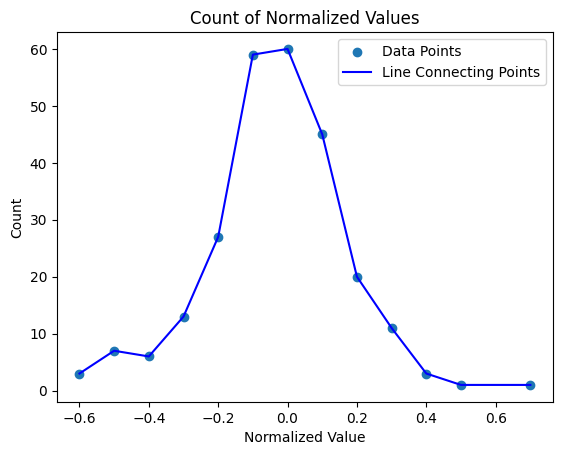

In [22]:
norm_value_counts = Counter(norm_bigrams.values())
norm_values, counts = zip(*norm_value_counts.items())

sorted_indices = sorted(range(len(norm_values)), key=lambda k: norm_values[k])
norm_values = [norm_values[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]

plt.scatter(norm_values, counts, label='Data Points')

plt.plot(norm_values, counts, color='blue', label='Line Connecting Points')

plt.xlabel('Normalized Value')
plt.ylabel('Count')
plt.title('Count of Normalized Values')
plt.legend()

plt.show()

## Final Normalised Bigrams:

In [23]:
final_norm_bigrams = {bigram: value for bigram, value in norm_bigrams.items() if value <= -0.3 or value >= 0.3}
print(dict(islice(final_norm_bigrams.items(), num_items)))
len(final_norm_bigrams)

{('big', 'deal'): -0.6, ('year', 'old'): -0.3, ('recommend', 'buy'): 0.3, ('buy', 'product'): 0.3, ('feel', 'great'): 0.4, ('3', 'month'): -0.3, ('read', 'review'): -0.3, ('br', 'so'): -0.5, ('work', 'fine'): -0.3, ('product', 'good'): 0.3, ('month', 'ago'): 0.3, ('br', 'the'): -0.5, ('br', 'thi'): -0.4, ('br', 'in'): -0.6, ('br', 'but'): -0.4, ('lose', 'weight'): 0.7, ('itbr', 'br'): -0.3, ('not', 'come'): -0.3, ('br', 'br'): -0.5, ('qualiti', 'great'): 0.4, ('br', '-PRON-'): -0.3, ('time', '-PRON-'): -0.3, ('br', 'overal'): -0.5, ('qualiti', 'product'): 0.3, ('year', 'ago'): -0.4, ('-PRON-', 'littl'): -0.3, ('-PRON-', 'would'): -0.3, ('4', 'star'): -0.4, ('sound', 'qualiti'): 0.3, ('recommend', 'friend'): 0.4}


45

**(29 - 16 split at values -0.3 and 0.3)**
*   Positive Difference = More in Fake Reviews
*   Negative Difference = More in Real Reviews

#**Implementing Bigrams:**

In [24]:
df = dataframe.copy()
df_bigrams = dataframe.copy()

In [25]:
def count_bigram_occurrences(row, desired_bigram):
    # if your code is running too slow, you can definitely speed this up
    text = row['REVIEW_TEXT']
    bigram_counts = Counter(get_bigrams(text))
    # Graham: Rewriting line
    #desired_value = bigram_counts.get(bigram, 0) if bigram == desired_bigram else 0
    desired_value = bigram_counts.get(desired_bigram, 0)
    return desired_value

# Creating columns and applying count_bigram_occurences funtion
for bigram in final_norm_bigrams:
    df_bigrams[bigram] = df_bigrams.apply(lambda row: count_bigram_occurrences(row, bigram), axis=1)

df_bigrams = df_bigrams.fillna(0)

In [26]:
pd.set_option('display.max_columns', None)

print(df_bigrams.iloc[349])

Unnamed: 0.4      349
Unnamed: 0.3      349
Unnamed: 0.2      349
Unnamed: 0.1      349
Unnamed: 0        349
                 ... 
(want, use)         0
(heavi, duti)       0
(wear, -PRON-)      0
(-PRON-, big)       0
(live, room)        0
Name: 349, Length: 84, dtype: object


# **Model:**

##Imports:

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

from keras.models import Sequential, Model
from keras.layers import Conv2D, Dropout, MaxPooling2D, Input
from keras.layers import BatchNormalization, Activation, Flatten, Dense
from tensorflow.keras import initializers

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler


In [28]:
def draw_roc_curve(y_test, y_score, title, c="blue", line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, color=c, lw=line_width, label = 'AUC = %0.3f' % aucroc)
  plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')
  plt.legend(loc = 'lower right')
  plt.show()
  print()

## Initialisation:

In [29]:
#With Bigram Implementation
features_bg = df_bigrams
features_bg = features_bg.drop(['LABEL_ENCODED'], axis = 1)
labels_bg = df_bigrams['LABEL_ENCODED']

#Without Bigram Implementation
features = df
features = features.drop(['LABEL_ENCODED'], axis = 1)
labels = df['LABEL_ENCODED']

In [30]:
x_train_bg, x_test_bg, y_train_bg, y_test_bg = train_test_split(features_bg, labels_bg, test_size = 0.2, random_state = 42)

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [31]:
#Vectorize training and test data
vectorizer = CountVectorizer()

x_train_bg_vectorized = vectorizer.fit_transform(x_train_bg['REVIEW_TEXT'])
x_test_bg_vectorized = vectorizer.transform(x_test_bg['REVIEW_TEXT'])

x_train_vectorized = vectorizer.fit_transform(x_train['REVIEW_TEXT'])
x_test_vectorized = vectorizer.transform(x_test['REVIEW_TEXT'])

## Decision Tree Classifier Model:

In [32]:
dtc_model_bg = DecisionTreeClassifier()

#With Bigram Implementation
dtc_model_bg.fit(x_train_bg_vectorized, y_train_bg)
dtc_pred_bg = dtc_model_bg.predict(x_test_bg_vectorized)

#Without Bigram Implementation
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train_vectorized, y_train)
dtc_pred = dtc_model.predict(x_test_vectorized)

Accuracy:  55.071 %
Confusion Matrix:
 [[1216  899]
 [ 988 1097]]


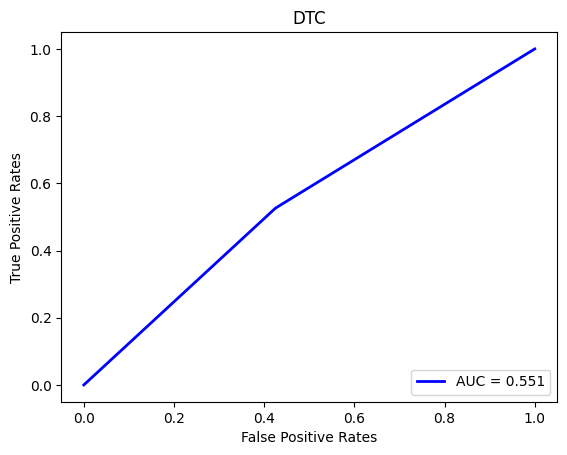


Accuracy:  54.19 %
Confusion Matrix:
 [[1207  908]
 [1016 1069]]


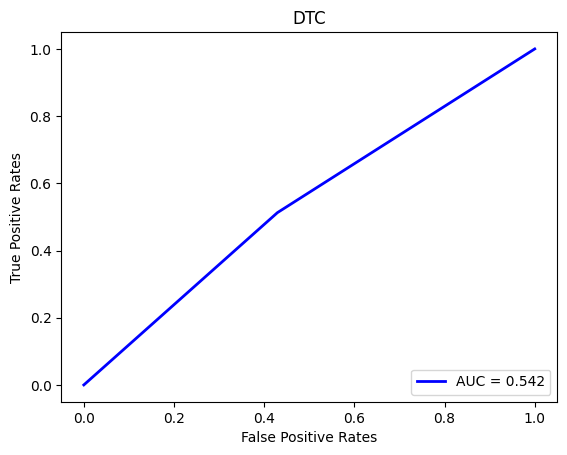

In [33]:
# Metrics

# With Bigram I
dtc_accuracy_bg = accuracy_score(y_test_bg, dtc_pred_bg)
dtc_confusion_matrix_bg = confusion_matrix(y_test_bg, dtc_pred_bg)

print("Accuracy: ", round((dtc_accuracy_bg*100), 3), "%")
print("Confusion Matrix:\n", dtc_confusion_matrix_bg)

# ROC curve
draw_roc_curve(y_test_bg, dtc_pred_bg, "DTC", c = "blue", line_width = 2)


#Without Bigram I
dtc_accuracy = accuracy_score(y_test, dtc_pred)
dtc_confusion_matrix = confusion_matrix(y_test, dtc_pred)

print("Accuracy: ", round((dtc_accuracy*100), 3), "%")
print("Confusion Matrix:\n", dtc_confusion_matrix)

draw_roc_curve(y_test, dtc_pred, "DTC", c = "blue", line_width = 2)

## Naive Bayes Model:

In [34]:
bayes_model_bg = MultinomialNB()

#With Bigram Implementation
bayes_model_bg.fit(x_train_bg_vectorized, y_train_bg)
bayes_pred_bg = bayes_model_bg.predict(x_test_bg_vectorized)


#Without Bigram Implementation
bayes_model = MultinomialNB()
bayes_model.fit(x_train_vectorized, y_train)
bayes_pred = bayes_model.predict(x_test_vectorized)

Accuracy:  63.619 %
Confusion Matrix:
 [[1500  615]
 [ 913 1172]]


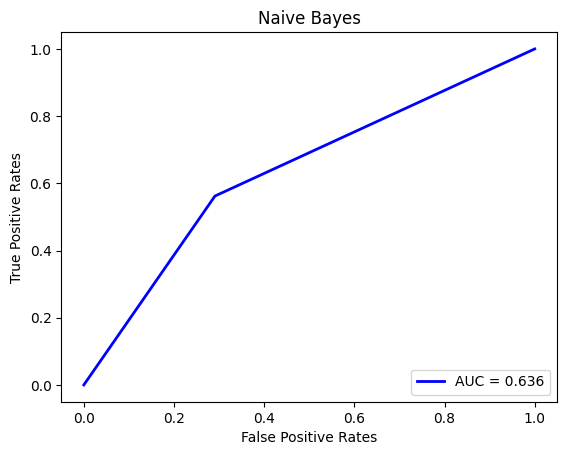


Accuracy:  63.619 %
Confusion Matrix:
 [[1500  615]
 [ 913 1172]]


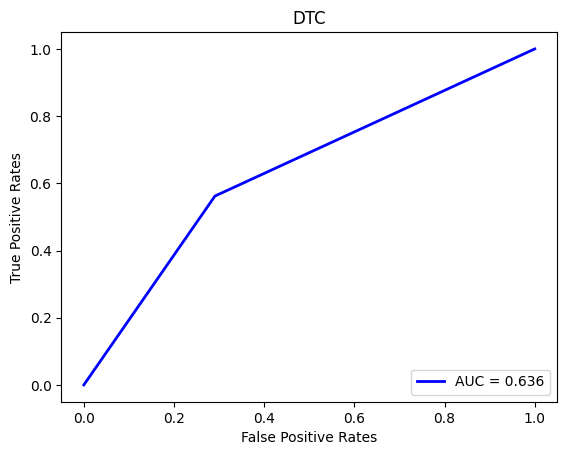

In [35]:
# Metrics

# With Bigram I
bayes_accuracy_bg = accuracy_score(y_test_bg, bayes_pred_bg)
bayes_confusion_matrix_bg = confusion_matrix(y_test_bg, bayes_pred_bg)

print("Accuracy: ", round((bayes_accuracy_bg*100), 3), "%")
print("Confusion Matrix:\n", bayes_confusion_matrix_bg)

# ROC curve
draw_roc_curve(y_test_bg, bayes_pred_bg, "Naive Bayes", c = "blue", line_width = 2)


#Without Bigram I
bayes_accuracy = accuracy_score(y_test, bayes_pred)
bayes_confusion_matrix = confusion_matrix(y_test, bayes_pred)

print("Accuracy: ", round((bayes_accuracy*100), 3), "%")
print("Confusion Matrix:\n", bayes_confusion_matrix)

draw_roc_curve(y_test, bayes_pred, "DTC", c = "blue", line_width = 2)

#**Neural Network:**

In [43]:
x_train_bg_array = x_train_bg_vectorized.toarray()
x_test_bg_array = x_test_bg_vectorized.toarray()

# With Bigram I
model_bg = Sequential()
model_bg.add(Dense(256, activation='relu', input_shape=(x_train_bg_array.shape[1],)))
model_bg.add(Dense(128, activation='relu'))
model_bg.add(Dense(128, activation='relu'))
model_bg.add(Dense(64, activation='relu'))
model_bg.add(Dense(64, activation='relu'))
model_bg.add(Dense(1, activation='sigmoid'))

model_bg.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_bg.fit(x_train_bg_array, y_train_bg, epochs = 5, batch_size = 32)

#Metrics
loss_bg , accuracy_bg = model_bg.evaluate(x_test_bg_array, y_test_bg)
print("Test Accuracy: ", round((accuracy_bg*100), 3), "%")


Epoch 1/5
525/525 [==============================] - 73s 136ms/step - loss: 0.6514 - accuracy: 0.6085
Epoch 2/5
525/525 [==============================] - 66s 126ms/step - loss: 0.4756 - accuracy: 0.7652
Epoch 3/5
525/525 [==============================] - 64s 121ms/step - loss: 0.1730 - accuracy: 0.9262
Epoch 4/5
525/525 [==============================] - 69s 132ms/step - loss: 0.0288 - accuracy: 0.9854
Epoch 5/5
132/132 [==============================] - 3s 20ms/step - loss: 3.6994 - accuracy: 0.6181
Test Accuracy:  61.81 %


In [1]:
x_train_array = x_train_vectorized.toarray()
x_test_array = x_test_vectorized.toarray()

#Without Bigram I
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(x_train_array.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(x_train_array, y_train, epochs = 5, batch_size = 32)

# Metrics
loss, accuracy = model.evaluate(x_test_array, y_test)
print("Test Accuracy: ", round((accuracy*100), 3), "%")

NameError: ignored

#Check:

In [293]:
df

,RATING,VERIFIED_PURCHASE,REVIEW_TITLE,REVIEW_TEXT,REVIEW_LENGTH,SENTIMENT_SCORE,TITLE_LENGTH,NUM_REVIEWS,SENTIMENT_CATEGORY_ENCODED,RATING_CATEGORY_ENCODED,LABEL_ENCODED,PREPROCESSED_REVIEW_TEXT,WORD_COUNT,PROP_NOUNS,PROP_VERBS,PROP_ADJECTIVES,PROP_ADVERBS
0,4,0,useful,think so product save day case need someth,116,0.5390,6,1,1,1,0,think product save day case need someth,8,0.500000,0.625000,0.125000,0.625000
1,4,1,New era for batteries,lithium batteri new introduc market averag dev...,404,0.2960,21,2,1,1,0,lithium batteri new introduc market averag dev...,37,0.405405,0.405405,0.324324,0.135135
2,3,0,doesn't swing very well.,purchas swing babi 6 month pretti grow -pron- ...,248,0.4059,24,1,1,1,0,purcha swing babi 6 month pretti grow -pron- l...,24,0.291667,0.541667,0.166667,0.416667
3,4,0,Great computing!,look inexpen desk calcolatur be work ne issu t...,212,0.0000,16,2,0,1,0,look inexpen desk calcolatur work ne issu tilt...,17,0.470588,0.588235,0.235294,0.294118
4,4,0,Only use twice a week,use twice week result great tooth whiten solut...,331,0.6249,21,2,1,1,0,use twice week result great tooth whiten solut...,20,0.700000,0.600000,0.350000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,4,1,wide width is great!,buy work high arch use arch support heel high,100,0.4019,20,1,1,1,1,buy work high arch use arch support heel high,9,0.444444,0.444444,0.333333,0.222222
20996,4,1,Love crocs!,croc brand shoe foot day work love cross unise...,115,0.6369,11,1,1,1,1,croc brand shoe foot day work love cross unise...,11,0.636364,0.363636,0.363636,0.090909
20997,5,1,I love moccasins This fit like it was custom m...,love moccasin fit like custom mebr veri soft c...,297,0.9182,57,1,1,1,1,love moccasin fit like custom mebr veri soft c...,25,0.320000,0.560000,0.240000,0.240000
20998,5,1,"This fit well, comfortable, best investment",wish littl durabl get catch bolt cross bunk fe...,287,0.7964,43,1,1,1,1,wish littl durabl catch bolt cross bunk feed c...,28,0.428571,0.464286,0.142857,0.035714


##Otherr:

In [79]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)
x_train.columns = x_train.columns.astype(str)
#x_test = [str(item) for item in x_test]

vectorizer = CountVectorizer()
#x_train_vectorized = vectorizer.fit_transform(x_train)
#x_test_vectorized = vectorizer.transform(x_test)


TypeError: ignored

In [78]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

pred = classifier.predict(x_test_vectorized)

accuracy = accuracy_score(y_test, pred)
report = classification_report(y_test, pred, target_names=df_bigrams.target_names)
confusion_mat = confusion_matrix(y_test, pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

draw_roc_curve(y_test, pred, "Multinomial Naive Bayes", c="blue", line_width=1)

TypeError: ignored

In [ ]:
model = tf.keras.models.Sequential()
model.add(Dense(64, activation='relu', input_dim=24))
model.add(Dropout(0.35))
model.add(Dense(32, activation='relu', input_dim=24))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu', input_dim=24))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=10)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=df_bigrams.target_names)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

ValueError: ignored

In [ ]:
X = df_bigrams
X = X.drop(['REVIEW_TEXT'], axis = 1)
X = X.drop(['REVIEW_TITLE'], axis = 1)
X = X.drop(['PREPROCESSED_REVIEW_TEXT'], axis = 1)
X = X.drop(['VERIFIED_PURCHASE'], axis = 1)
X = X.drop(['SENTIMENT_CATEGORY_ENCODED'], axis = 1)
X = X.drop(['RATING_CATEGORY_ENCODED'], axis = 1)
X = X.drop(['LABEL_ENCODED'], axis = 1)
Y = df_bigrams['LABEL_ENCODED']

print("X shape before processing is", X.shape)

numerical_pipeline = Pipeline([
                               ("std_scaler", StandardScaler())
                               ])

numerical_features = list(X)
categorical_features = ["VERIFIED_PURCHASE", "SENTIMENT_CATEGORY_ENCODED", "RATING_CATEGORY_ENCODED"]

full_pipeline = ColumnTransformer([
                ("numerical", numerical_pipeline, numerical_features),
                ("categorical", OneHotEncoder(), categorical_features)
                ])
X_prepared = full_pipeline.fit_transform(X)

print("X shape after processing is", X_prepared.shape)

'''
features_mod = df_modified
features_mod = features_mod.drop(['LABEL_ENCODED'], axis = 1)
labels_mod = df_modified['LABEL_ENCODED']
'''

X shape before processing is (2266, 17)


TypeError: ignored

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming you have a DataFrame named df_bigrams with column names

# Drop the unwanted columns from the features DataFrame
X = df_bigrams.drop(['REVIEW_TEXT', 'REVIEW_TITLE', 'PREPROCESSED_REVIEW_TEXT',
                     'LABEL_ENCODED'], axis=1)

# Convert all feature names to strings
X_without_column_names = X.copy()
X_without_column_names.columns = range(X_without_column_names.shape[1])

print("X shape before processing is", X_without_column_names.shape)

# Define the lists of numerical and categorical features
numerical_features = list(X_without_column_names)
categorical_features = ['VERIFIED_PURCHASE', 'SENTIMENT_CATEGORY_ENCODED', 'RATING_CATEGORY_ENCODED']

# Check if the specified categorical features exist in the DataFrame
missing_features = set(categorical_features) - set(X_without_column_names.columns)
#if missing_features:
#    raise ValueError(f"The following columns are missing in the DataFrame: {missing_features}")

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("one_hot_encoder", OneHotEncoder())
])

# Combine the preprocessing pipelines using ColumnTransformer
full_pipeline = ColumnTransformer([
    ("numerical", numerical_pipeline, numerical_features),
    ("categorical", categorical_pipeline, categorical_features)
])

# Apply preprocessing to X_without_column_names
X_prepared = full_pipeline.fit_transform(X_without_column_names)

print("X shape after processing is", X_prepared.shape)

X shape before processing is (2266, 20)


ValueError: ignored

In [86]:
# Vectorize the training and test data
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train['REVIEW_TEXT'])
x_test_vectorized = vectorizer.transform(x_test['REVIEW_TEXT'])

# Define and train the model
model = DecisionTreeClassifier()
model.fit(x_train_vectorized, y_train)

# Predict on the test data
pred = model.predict(x_test_vectorized)

# Metrics
accuracy = accuracy_score(y_test, pred)
report = classification_report(y_test, pred, target_names=['Fake', 'Real'])
confusion_mat = confusion_matrix(y_test, pred,  target_names=['Fake', 'Real'])

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

# ROC curve
draw_roc_curve(y_test, pred, "DTC", c="blue", line_width=1)

TypeError: ignored

Accuracy: 0.6320634920634921
Classification Report:
               precision    recall  f1-score   support

        Fake       0.62      0.71      0.66      3189
        Real       0.65      0.56      0.60      3111

    accuracy                           0.63      6300
   macro avg       0.63      0.63      0.63      6300
weighted avg       0.63      0.63      0.63      6300

Confusion Matrix:
 [[2249  940]
 [1378 1733]]


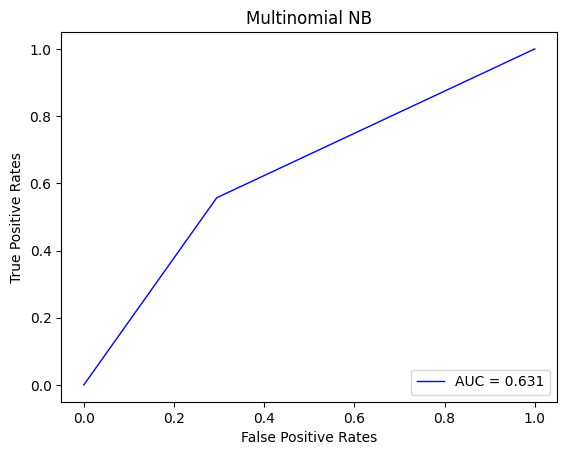

In [82]:
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train['REVIEW_TEXT'])
x_test_vectorized = vectorizer.transform(x_test['REVIEW_TEXT'])

# Define and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(x_train_vectorized, y_train)

# Predict on the test data
pred = model.predict(x_test_vectorized)

# Calculate metrics
accuracy = accuracy_score(y_test, pred)
report = classification_report(y_test, pred, target_names=['Fake', 'Real'])
confusion_mat = confusion_matrix(y_test, pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

# Draw ROC curve (assuming the draw_roc_curve function is defined)
draw_roc_curve(y_test, pred, "Multinomial NB", c="blue", line_width=1)